Loading required package: Matrix

Loading required package: foreach

Loading required package: parallel

Loading required package: sp

This is INLA_22.12.16 built 2022-12-23 13:24:10 UTC.
 - See www.r-inla.org/contact-us for how to get help.
 - To enable PARDISO sparse library; see inla.pardiso()



[1] -0.341135375 -0.316461568 -0.311111834 -0.401638247 -0.469870425
  [6] -0.583337455 -0.652255208 -0.704412651 -0.777418133 -0.721096316
 [11] -0.839840091 -0.850690922 -0.702721552 -0.775693959 -0.621234278
 [16] -0.603345598 -0.454774705 -0.379187408 -0.146493620 -0.081190177
 [21]  0.047572402  0.177323064  0.328309356  0.382078229  0.310350992
 [26]  0.532847382  0.303096922  0.363217322  0.243839721  0.217518997
 [31]  0.071765968  0.042802557  0.000641201 -0.117755145 -0.186064620
 [36] -0.236694806 -0.305960497 -0.228583507 -0.327164437 -0.226556631
 [41] -0.238027801 -0.097332024 -0.135486950 -0.009400963  0.024230651
 [46]  0.137038142  0.322592687  0.390085150  0.558153359  0.537712469
 [51]  0.606211681  0.736355133  0.977187450  0.899339684  0.931180075
 [56]  0.976219137  0.946481734  0.962642542  1.095660159  1.160863888
 [61]  1.002846266  1.021033846  0.967980295  0.966211683  0.960601960
 [66]  0.843497775  0.832484931  0.909420149  0.679369435  0.522735995
 [71]  0.541246098  0.428340911  0.302769128  0.111975263 -0.001076183
 [76] -0.013045766 -0.180979101 -0.358585014 -0.461419054 -0.377201271
 [81] -0.620915454 -0.577209364 -0.579780777 -0.576365778 -0.560020388
 [86] -0.591625552 -0.487681848 -0.445397269 -0.450854873 -0.418713863
 [91] -0.446142566 -0.317214830 -0.306479850 -0.274199378 -0.230056997
 [96] -0.178244117 -0.194268007 -0.292504451 -0.023841921 -0.180985234

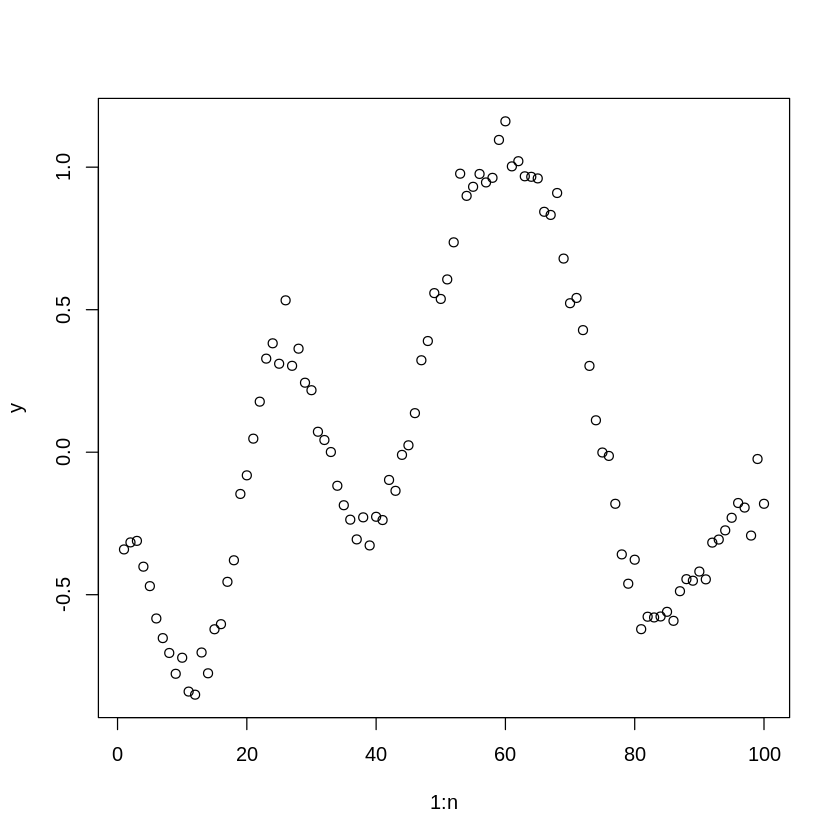

In [1]:
library(INLA)
library(invgamma)
library("MASS")
library("fdrtool") # for rhalfnorm


n = 100

x= (1:n) / n

# =================================================
# gp definition

# kernel priors
length = rinvgamma(1, 4.0, 1.0)
var = rlnorm(1, 0., 0.1)

# distance matrix
XtX <- tcrossprod(x)
XX <- matrix(1, n) %*% diag(XtX)
D <- XX - 2*XtX + t(XX) # distance matrix

# complete kernel
k = var * exp(-0.5 * (D/length ^ 2 ))
k = k + diag(2e-5, n, n)

f = mvrnorm(1, rep(0, n), k)

sigma = rhalfnorm(1, 100)
sigma_mat = diag(sigma, n, n) 
y = mvrnorm(1, f, sigma_mat)

plot(1:n, y)
y

In [2]:
obs_idx = c(8, 24, 45, 61, 77, 84)
gt_obs = c(-0.5724526,   0.1252361,   0.72148114,  0.25085276, -0.3888183,  -0.62317157)

observations = rep(NA, n)
for (i in 1:length(obs_idx)){
    observations[obs_idx[i]] = gt_obs[i]
}
observations

test_inla = inla(y~obs )

[1]         NA         NA         NA         NA         NA         NA
  [7]         NA -0.5724526         NA         NA         NA         NA
 [13]         NA         NA         NA         NA         NA         NA
 [19]         NA         NA         NA         NA         NA  0.1252361
 [25]         NA         NA         NA         NA         NA         NA
 [31]         NA         NA         NA         NA         NA         NA
 [37]         NA         NA         NA         NA         NA         NA
 [43]         NA         NA  0.7214811         NA         NA         NA
 [49]         NA         NA         NA         NA         NA         NA
 [55]         NA         NA         NA         NA         NA         NA
 [61]  0.2508528         NA         NA         NA         NA         NA
 [67]         NA         NA         NA         NA         NA         NA
 [73]         NA         NA         NA         NA -0.3888183         NA
 [79]         NA         NA         NA         NA         NA -0.6231716
 [85]         NA         NA         NA         NA         NA         NA
 [91]         NA         NA         NA         NA         NA         NA
 [97]         NA         NA         NA         NA